# NOTE - PLEASE SCROLL ALL THE WAY DOWN FOR ASSIGNMENT QUESTIONS.


### Citibike Data Analysis using Pandas

#### This notebook analyzes Feb 2015 Citibike data.  You can find this data in the source data folder and linked off of the handouts page.  

#### once downloaded, the .csv file should be placed in the same location as this .ipynb file.

#### (to download the CSV file as a zip), you can also find it at https://s3.amazonaws.com/tripdata/201502-citibike-tripdata.zip.




#### 0) Import the libraries

In [7]:
import pandas as pd
import numpy as np

#### 1) Let us load the Citibike data using Pandas read_csv method. It creates a DataFrame object comprised of rows and columns.

In [10]:
df = pd.read_csv('201502-citibike-tripdata.csv')

#### 2) How big is this dataset?

In [3]:
# What is the size of this dataset?
df.shape

(196930, 15)

#### 3) What are the column names?

In [7]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

#### 4) Let us look at the data, shall we? The head() function is used to look at the first 5 rows.

In [5]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1


#### 5) Let us try to see how the DataFrame figured out the data types using dtypes.

In [10]:
df.dtypes

tripduration                 int64
starttime                   object
stoptime                    object
start station id             int64
start station name          object
start station latitude     float64
start station longitude    float64
end station id               int64
end station name            object
end station latitude       float64
end station longitude      float64
bikeid                       int64
usertype                    object
birth year                 float64
gender                       int64
dtype: object

#### 6) We can look at the summary statistics using the describe() function. As you can see, some of them don't make sense for certain columns. Pandas did however, leave out object data types.

In [282]:
df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,biker_age
count,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,194663.000000,196930.000000,194663.000000
mean,649.383207,438.669949,40.735784,-73.990074,438.540695,40.735530,-73.990391,18120.012278,1975.288031,1.156203,39.711969
std,873.231710,321.320871,0.018569,0.011522,321.595789,0.018480,0.011508,2074.916613,11.734009,0.393946,11.734009
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14530.000000,1899.000000,0.000000,16.000000
25%,340.000000,307.000000,40.723684,-73.997901,307.000000,40.723627,-73.998102,16338.000000,1967.000000,1.000000,30.000000
50%,507.000000,417.000000,40.737815,-73.990093,415.000000,40.737262,-73.990697,18089.000000,1977.000000,1.000000,38.000000
75%,764.000000,491.000000,40.750380,-73.981854,491.000000,40.750200,-73.981923,19886.000000,1985.000000,1.000000,48.000000
max,43016.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21703.000000,1999.000000,2.000000,116.000000


#### 7) It is time to find out more about the various types of users. The unique() keyword can help.

In [43]:
# What are the unique user types? 
df['usertype'].unique()

array(['Subscriber', 'Customer'], dtype=object)

#### 8) How about the genders? What is 0? :)

In [12]:
# What are the unique genders? 
df['gender'].unique()

array([2, 1, 0])

### COLUMN DESCRIPTIONS FROM Citibike website
#### http://www.citibikenyc.com/system-data
- Trip Duration (seconds)
- Start Time and Date
- Stop Time and Date
- Start Station Name
- End Station Name
- Station ID
- Station Lat/Long
- Bike ID
- User Type (Customer = 24-hour pass or 7-day pass user; Subscriber = Annual Member)
- Gender (Zero=unknown; 1=male; 2=female)
- Year of Birth

#### 9) Let us now go ahead and plot a bar chart of genders. We will use matplotlib as our plotting library.

#### a) We want to plot the graphs within the IPython notebook, so we use matplotlib inline command.
#### b) We also want to use a nicer style as a theme. There are several available styles. We use ggplot.

In [119]:
# This line ensures that the plot is inline, within the IPython notebook. 
# Otherwise, it will open a separate window.
%matplotlib inline 

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

#### 10) Now, we want to know how many of each gender. Pandas DataFrame provides a nice function called groupby that allows you to group a column, and count using size(). Finally, you can use order() to order the data. By default, it is in ascending order (ascending = true).

In [120]:
# 
# SQL: SELECT gender, count(gender) FROM df 
#      GROUP BY gender ORDER BY count(gender) DESC
#

gender_df = df.groupby('gender').size().order(ascending=False)
gender_df

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     my_plot.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom')

gender
1    161563
2     33064
0      2303
dtype: int64

#### 11) Let us chart a simple plot of the genders

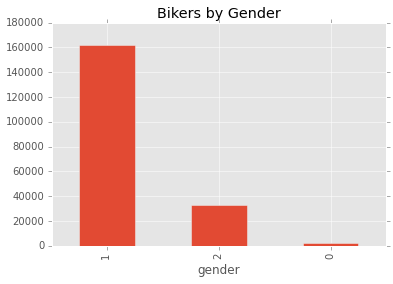

In [121]:
#plt.figure(figsize=(9, 6))
gender_df.plot(kind='bar',title="Bikers by Gender")

#### 12) We can also set the X and Y-axis labels using set_xlabel() and set_ylabel(). The plot can be adjusted using figsize variable.


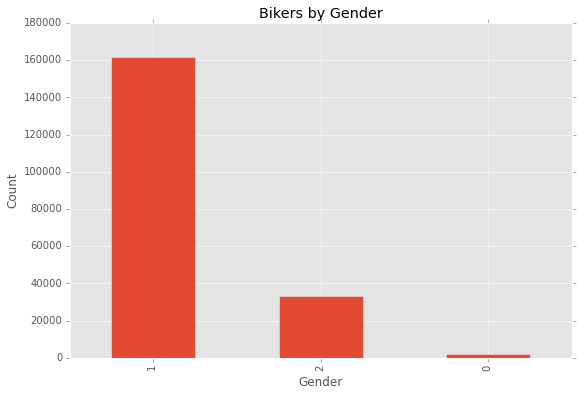

In [122]:
plt.figure(figsize=(9, 6))
my_plt = gender_df.plot(kind='bar',legend=None,title="Bikers by Gender")
my_plt.set_xlabel("Gender")
my_plt.set_ylabel("Count")

#### 13) Let us now check on our user types using a group by on usertype.

In [170]:
# SQL: SELECT usertype, count(usertype) FROM df
#      GROUP BY usertype

df.groupby('usertype').size()

usertype
Customer        2265
Subscriber    194665
dtype: int64

#### 14) Let us do something interesting here. I want to know how many riders have ridden each day of the month of February 2015. We do have the starttime and stoptime columns.

In [171]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1


#### 15) What is the data type of starttime? Is it a datetime data type? No, it is of type object (O).

In [172]:
df['starttime'].dtype

dtype('O')

#### 16) So I want to see how many unique start times I can get for 1 day.  I can use the ampersand (&) operator as a Boolean indexing operator. It acts as a filter. If both conditions are true below, then that row gets selected.

#### Unfortunately, I am not seeing the right results. Where did 2/19/2015 come from? Obviously this logic is not right...because the startime values are treated as strings, instead of datetimes.

In [173]:
df[((df['starttime'] >= '2/1/2015') & (df['starttime'] < '2/2/2015'))]['starttime'].unique()

array(['2/1/2015 0:00', '2/1/2015 0:01', '2/1/2015 0:02', ...,
       '2/19/2015 23:57', '2/19/2015 23:58', '2/19/2015 23:59'], dtype=object)

#### 17) Let us create a new column starttime_new that will be a datetime type, and set it to data from starttime column. The to_datetime() function helps. It converts each starttime value to a datetime type, into the format that I mentioned below.

In [174]:
df['starttime_new'] =  pd.to_datetime(df['starttime'], format='%m/%d/%Y %H:%M')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime_new
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1,2015-02-01 00:01:00


#### 18) Let us rerun our earlier query, this time with starttime_new.

In [175]:
df[((df['starttime_new'] >= '2/1/2015') & (df['starttime_new'] < '2/2/2015'))]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime_new
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1,2015-02-01 00:01:00
5,717,2/1/2015 0:02,2/1/2015 0:14,373,Willoughby Ave & Walworth St,40.693317,-73.953820,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,15854,Subscriber,1979,1,2015-02-01 00:02:00
6,1306,2/1/2015 0:04,2/1/2015 0:26,352,W 56 St & 6 Ave,40.763406,-73.977225,504,1 Ave & E 15 St,40.732219,-73.981656,15173,Subscriber,1983,1,2015-02-01 00:04:00
7,913,2/1/2015 0:04,2/1/2015 0:19,439,E 4 St & 2 Ave,40.726281,-73.989780,116,W 17 St & 8 Ave,40.741776,-74.001497,17862,Subscriber,1955,1,2015-02-01 00:04:00
8,759,2/1/2015 0:04,2/1/2015 0:17,335,Washington Pl & Broadway,40.729039,-73.994046,2012,E 27 St & 1 Ave,40.739445,-73.976806,21183,Subscriber,1985,2,2015-02-01 00:04:00
9,585,2/1/2015 0:05,2/1/2015 0:15,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,444,Broadway & W 24 St,40.742354,-73.989151,14843,Subscriber,1982,1,2015-02-01 00:05:00


#### 19) The goal is to get unique dates, not datetimes. We can map all the unique starttime to pd.Timestamp.date. 
#### The map function works like a loop. It applies the function pd.Timestamp.date to every single date value in df["starttime_new"]. Once it converts all values in this column to dates, we are now ready to get the unique dates using the unique() function.

In [176]:
df["starttime_new"].map(pd.Timestamp.date).unique()

array([datetime.date(2015, 2, 1), datetime.date(2015, 2, 2),
       datetime.date(2015, 2, 3), datetime.date(2015, 2, 4),
       datetime.date(2015, 2, 5), datetime.date(2015, 2, 6),
       datetime.date(2015, 2, 7), datetime.date(2015, 2, 8),
       datetime.date(2015, 2, 9), datetime.date(2015, 2, 10),
       datetime.date(2015, 2, 11), datetime.date(2015, 2, 12),
       datetime.date(2015, 2, 13), datetime.date(2015, 2, 14),
       datetime.date(2015, 2, 15), datetime.date(2015, 2, 16),
       datetime.date(2015, 2, 17), datetime.date(2015, 2, 18),
       datetime.date(2015, 2, 19), datetime.date(2015, 2, 20),
       datetime.date(2015, 2, 21), datetime.date(2015, 2, 22),
       datetime.date(2015, 2, 23), datetime.date(2015, 2, 24),
       datetime.date(2015, 2, 25), datetime.date(2015, 2, 26),
       datetime.date(2015, 2, 27), datetime.date(2015, 2, 28)], dtype=object)

#### 20) Now that we can get unique dates, we can create another new column startdate_new, and populate it with dates.

In [126]:
df['startdate_new'] = df['starttime_new'].map(pd.Timestamp.date)

#### 21) Checking if we see it..the head() function helps.

In [127]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime_new,startdate_new
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2,2015-02-01 00:00:00,2015-02-01
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1,2015-02-01 00:00:00,2015-02-01
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2,2015-02-01 00:01:00,2015-02-01
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2,2015-02-01 00:01:00,2015-02-01
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1,2015-02-01 00:01:00,2015-02-01


#### 22) Now, we can do a groupby() and count the number of riders per day. It seems to be in order by date already.

In [32]:
# SQL: SELECT startdate_new, count(startdate_new) FROM df
#      GROUP BY startdate_new
#
df.groupby('startdate_new').size()

startdate_new
2015-02-01     6441
2015-02-02     1459
2015-02-03     4754
2015-02-04     8973
2015-02-05     9208
2015-02-06     8575
2015-02-07     6790
2015-02-08     6662
2015-02-09     5160
2015-02-10    10328
2015-02-11    11439
2015-02-12    11269
2015-02-13     7642
2015-02-14     4614
2015-02-15     2581
2015-02-16     3998
2015-02-17     4784
2015-02-18     9170
2015-02-19     7799
2015-02-20     6159
2015-02-21     3157
2015-02-22     4274
2015-02-23     7458
2015-02-24     7402
2015-02-25    10751
2015-02-26     9901
2015-02-27     9864
2015-02-28     6318
dtype: int64

#### 23) Let us plot a horizontal bar chart this time. First, we save the results in a new DataFrame startdate_df. Then, we plot it.

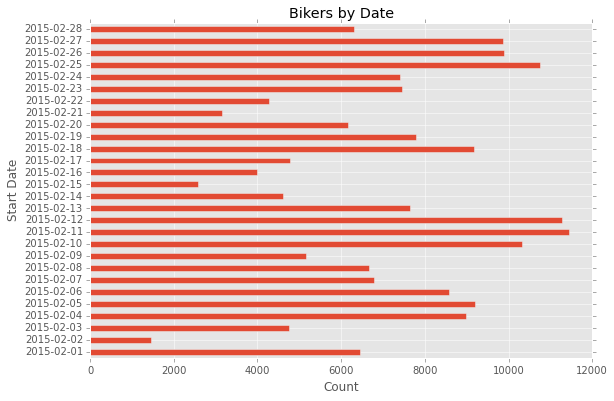

In [41]:
startdate_df = df.groupby('startdate_new').size()#.order(ascending=False)

plt.figure(figsize=(9, 6))
my_plot = startdate_df.plot(kind='barh',title="Bikers by Date")
my_plot.set_xlabel("Count")
my_plot.set_ylabel("Start Date")


#### 24) I wanted to know how many people returned their bike to the starting station. This means comparing the start station and end station ids.

In [128]:
df[df['start station id'] == df['end station id']]['start station id'].count()

2935

#### 25) What are the top 5 most popular bike pickup (start) stations?

In [45]:
# Most popular pickup (start) stations
df.groupby(['start station id','start station name']).size().order(ascending=False)[:5]

start station id  start station name      
521               8 Ave & W 31 St             2238
435               W 21 St & 6 Ave             2143
293               Lafayette St & E 8 St       2130
318               E 43 St & Vanderbilt Ave    2102
477               W 41 St & 8 Ave             2078
dtype: int64

#### 26) What about top 5 bike dropoff (end) stations?

In [46]:
# Most popular dropoff (end) stations
df.groupby(['end station id','end station name']).size().order(ascending=False)[:5]

end station id  end station name        
477             W 41 St & 8 Ave             2548
293             Lafayette St & E 8 St       2244
318             E 43 St & Vanderbilt Ave    2239
435             W 21 St & 6 Ave             2221
492             W 33 St & 7 Ave             2155
dtype: int64

#### 27) What about top 5 most popular pickup = dropoff stations?

In [47]:
# Most popular pickup = dropoff (end) stations
df[df['start station id'] == df['end station id']].groupby(
    ['start station id','start station name']).size().order(ascending=False)[:5]

start station id  start station name        
2006              Central Park S & 6 Ave        85
330               Reade St & Broadway           51
431               Hanover Pl & Livingston St    41
401               Allen St & Rivington St       36
531               Forsyth St & Broome St        33
dtype: int64

### 28) How many people over 50 rode the bikes?

#### i) First, get the current year

In [129]:
# How many people over 50 rode the bikes?
from datetime import date
current_year = date.today().year
print current_year
type(current_year)

2015


int

#### ii) Now, create a new column biker_age, that lets us know the present age of each biker. Here, we use the lambda expression to apply() a function - in this case, (current_year - age). It goes through every column value and applies this calculation.

In [50]:
df['biker_age'] = df['birth year'].apply(lambda age: current_year - age)

#### iii) Now, show the bikers over 50

In [56]:
df[df['biker_age'] > 50]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime_new,startdate_new,biker_age
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1,2015-02-01 00:01:00,2015-02-01,58
7,913,2/1/2015 0:04,2/1/2015 0:19,439,E 4 St & 2 Ave,40.726281,-73.989780,116,W 17 St & 8 Ave,40.741776,-74.001497,17862,Subscriber,1955,1,2015-02-01 00:04:00,2015-02-01,60
19,711,2/1/2015 0:15,2/1/2015 0:27,445,E 10 St & Avenue A,40.727408,-73.981420,223,W 13 St & 7 Ave,40.737815,-73.999947,21516,Subscriber,1960,1,2015-02-01 00:15:00,2015-02-01,55
23,389,2/1/2015 0:16,2/1/2015 0:23,507,E 25 St & 2 Ave,40.739126,-73.979738,518,E 39 St & 2 Ave,40.747804,-73.973442,16391,Subscriber,1957,1,2015-02-01 00:16:00,2015-02-01,58
44,548,2/1/2015 0:28,2/1/2015 0:37,515,W 43 St & 10 Ave,40.760094,-73.994618,466,W 25 St & 6 Ave,40.743954,-73.991449,16731,Subscriber,1964,1,2015-02-01 00:28:00,2015-02-01,51
45,511,2/1/2015 0:30,2/1/2015 0:38,327,Vesey Pl & River Terrace,40.715338,-74.016584,195,Liberty St & Broadway,40.709056,-74.010434,17505,Subscriber,1954,1,2015-02-01 00:30:00,2015-02-01,61
70,262,2/1/2015 0:48,2/1/2015 0:52,449,W 52 St & 9 Ave,40.764618,-73.987895,457,Broadway & W 58 St,40.766953,-73.981693,19687,Subscriber,1961,1,2015-02-01 00:48:00,2015-02-01,54
95,551,2/1/2015 1:13,2/1/2015 1:22,453,W 22 St & 8 Ave,40.744751,-73.999154,546,E 30 St & Park Ave S,40.744449,-73.983035,17994,Subscriber,1961,1,2015-02-01 01:13:00,2015-02-01,54
96,398,2/1/2015 1:13,2/1/2015 1:19,250,Lafayette St & Jersey St,40.724561,-73.995653,401,Allen St & Rivington St,40.720196,-73.989978,16235,Subscriber,1961,1,2015-02-01 01:13:00,2015-02-01,54
103,1757,2/1/2015 1:22,2/1/2015 1:51,212,W 16 St & The High Line,40.743349,-74.006818,518,E 39 St & 2 Ave,40.747804,-73.973442,18487,Subscriber,1959,1,2015-02-01 01:22:00,2015-02-01,56


#### iv) What? So many bikers over 50? Something seems suspicious here.

In [84]:
df[df['biker_age'] > 50]['biker_age'].count()

39367

#### v) Let us a do a groupby and get the total bikers for each biker_age. It seems clear that there are very old bikers, way over 100 years old. :)

In [70]:
# SQL: SELECT biker_age, COUNT(biker_age) FROM df
#      GROUP BY biker_age
#      WHERE biker_age > 50

df[df['biker_age'] > 50].groupby('biker_age').size()

biker_age
51     3876
52     4265
53     3664
54     2789
55     3315
56     2831
57     3209
58     1934
59     2079
60     1769
61     1804
62     1582
63     1093
64     1066
65      695
66      603
67      673
68      361
69      406
70      114
71      237
72      112
73      264
74      194
75      119
76       14
77      100
78        6
80       28
81       39
84        2
85       11
86        1
89        3
90        1
93       12
105       2
114       9
115      83
116       2
dtype: int64

#### vi) Let us group them into biker age ranges. I have chosen 5 ranges as follows. 

In [75]:
biker_age_labels = ['1-25', '26-50', '51-75', '76-100', '101-125']

#### vii) The Pandas cut command allows us to define custom bins (groups) to categorize data. 
- The range defines the minimum value (0), maximum value (126) and bin size of 25. 
- right=False refers to not picking up the last value of the previous range.
   e.g. if right = true, [0, 25, 50, 75, 100, 125] = [0, 25], [25, 50] etc.
- labels - refers to user-defined labels

In [100]:
df['biker_age_group'] = pd.cut(df.biker_age, range(0, 126, 25), 
                               right=False, labels=biker_age_labels)

#### viii) Let us check

In [107]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime_new,startdate_new,biker_age,biker_age_group
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2,2015-02-01 00:00:00,2015-02-01,37,26-50
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1,2015-02-01 00:00:00,2015-02-01,22,1-25
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2,2015-02-01 00:01:00,2015-02-01,46,26-50
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2,2015-02-01 00:01:00,2015-02-01,30,26-50
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1,2015-02-01 00:01:00,2015-02-01,58,51-75


#### ix) Let us finally get it all together with a group by on biker_age_group and an aggregation on biker_age. The agg function simply counts the biker ages using NumPy's  size. Wow, lots of over 100 people..let us check their birth year.

In [108]:
# SQL: SELECT biker_age_group, COUNT(biker_age) FROM df
#      GROUP BY biker_age_group
#
df.groupby('biker_age_group').agg({'biker_age': np.size})

,biker_age
biker_age_group,
1-25,11678
26-50,139756
51-75,42797
76-100,336
101-125,96


#### x) Let us get their birth year..really curious to know. Interesting..everyone has 1900/1901 as their birth year. This must have happened because birth year may be an optional field when they signed up for Citibikes.

In [109]:
# Do you see any issue with the results above? :)
df[df['biker_age_group'] == '101-125']['birth year']

#THIS IS REALLY HARD TO BELIEVE. :)

2569      1900
2587      1900
4679      1900
6265      1900
6304      1900
6964      1900
7528      1900
8906      1900
10847     1900
13850     1900
13882     1900
14779     1910
17525     1901
18041     1900
19270     1900
23139     1900
23361     1900
23689     1900
27686     1900
28915     1900
31592     1900
32067     1900
33000     1910
36555     1900
44684     1900
48708     1900
51988     1900
54401     1900
54468     1900
54775     1900
          ... 
132334    1900
136032    1900
136389    1900
146423    1900
146500    1900
149542    1901
150193    1900
150653    1900
153644    1900
157234    1900
157290    1900
158139    1900
161076    1900
161513    1900
166956    1900
169414    1900
172180    1900
172609    1900
176479    1901
177476    1900
177969    1900
178768    1900
179446    1900
179831    1899
181852    1900
182109    1900
182706    1900
186368    1901
186744    1900
186890    1900
Name: birth year, dtype: float64

#### 29) What is the longest trip? We can use the max() function. That is so long..43016 seconds?

In [113]:
# How long is the longest trip?
df['tripduration'].max()

43016

#### 30) How many hours/min/sec? Divmod function gives the quotient and remainder in 2 variables.

In [111]:
m, s = divmod(df['tripduration'].max(), 60)
h, m = divmod(m, 60)
print "%dh:%02dm:%02ds" % (h, m, s)

11h:56m:56s


#### 31) Who is this guy?

In [219]:
df[df['tripduration'] == 43016]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,starttime_new,startdate_new,biker_age,biker_age_group
7815,43016,2/2/2015 22:00,2/3/2015 9:57,263,Elizabeth St & Hester St,40.71729,-73.996375,250,Lafayette St & Jersey St,40.724561,-73.995653,20263,Subscriber,1955,1,2015-02-02 22:00:00,2015-02-02,60,51-75


#### 32) What is the shortest trip? Only 60 seconds? That must be a mistake. :)

In [22]:
df['tripduration'].min()

60

In [7]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957,1


---
# ASSIGNMENT QUESTIONS

### QUESTION 1: The tripduration column indicates how many seconds a biker used the bike. If you notice, some bikers kept the bike for several hours, others kept for it just a few seconds.

### Get a count of bikers whose trip duration was <= 80 sec. Plot a bar chart of the trip duration vs this count.

- Write a group by statement and store the results in a variable.
- Set the plot figsize to (8, 5).
- Plot the graph, and set the title to Bikers by Trip duration.
- Set the x-axis label to Trip duration.
- Set the y-axis label to Count.

In [99]:
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
#### Trip duration less than 80 secs, unique values

In [125]:
fst_riders = df[df['tripduration'] <= 80]['bikeid'].nunique()
fst_riders

493

In [100]:
grouped = df[df['tripduration'] <= 80].groupby('tripduration')
duration_counts = grouped['bikeid'].nunique()
duration_counts

tripduration
60    35
61    25
62    34
63    20
64    38
65    19
66    27
67    19
68    26
69    26
70    27
71    19
72    20
73    31
74    26
75    23
76    32
77    28
78    26
79    28
80    31
Name: bikeid, dtype: int64

In [96]:
duration_counts.sum()

560

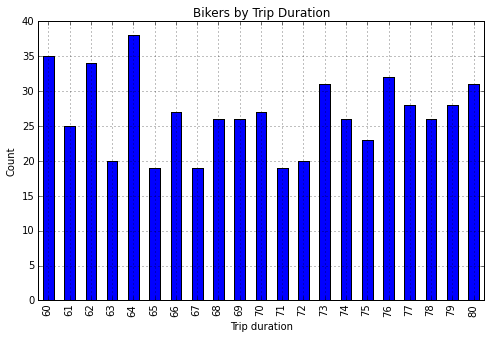

In [97]:
plt.figure(figsize=(8, 5))
my_plot = duration_counts.plot(kind='bar', title="Bikers by Trip Duration")
my_plot.set_xlabel("Trip duration")
my_plot.set_ylabel("Count")

### QUESTION 2: Calculate the average(mean) trip duration in this dataset.

In [114]:
seconds_duration = df.tripduration.mean()

print "Average duration is {0:.2f} minutes".format(seconds_duration / 60)

Average duration is 10.82 minutes


### QUESTION 3: How many unique bikes were used in this dataset?

In [118]:
unique_bikes = df.bikeid.nunique()
unique_bikes

4466

### QUESTION 4: How many unique bikes were used where trip duration <= 80?

In [121]:
fast_riders = df[df['tripduration'] <= 80].bikeid.nunique()
fast_riders

493

### QUESTION 5: What is the persentage of unique bikes used in Question 4 (trip duration <=80) to the total unique bikes found in Question 3?

In [129]:
percentage = float(fast_riders) / unique_bikes
print "Percentage = %{0:.2f}".format(percentage * 100) 

Percentage = %11.04
